# Homework 0

## Problem 1

1. Gradient of Lagrangian

$\bigtriangledown$<sub>x</sub><sup>L</sup> = A<sup>T</sup>(Ax-b) + 2 x $\lambda$  

2. Unconstrained least square

x = (A<sup>T</sup>A)<sup>-1</sup>A<sup>T</sup>b 

3.a

 x = (A<sup>T</sup>A+2 $\lambda$ I)<sup>-1</sup>(A<sup>T</sup>b) 

3.b

(your work here)

4. Implement

In [1]:
import numpy as np
npz = np.load('HW0_P1.npz')
A = npz['A']
b = npz['b']
eps = npz['eps']
A.shape, A.dtype, b.shape, b.dtype, eps

((100, 30), dtype('float64'), (100,), dtype('float64'), array(0.5))

In [19]:
def solve(A, b, eps):
    # your implementation here
    errLimit, err = 0.00001, 1
    lambda1, lambda2 = 0, 1
    while (abs(err) > errLimit):
        lambdaMid = (lambda2 + lambda1)/2
        x = (np.linalg.inv(A.T @ A + 2*lambdaMid*np.identity(A.shape[1])) @ A.T @ b)
        err = x@x-eps 
        print("err:")
        print(err)
        if (err < 0):
            lambda2 = lambdaMid
        else:
            lambda1 = lambdaMid
    # prod = prod @ prod
    return x

In [20]:
# Evaluation code, you need to run it, but do not modify
x = solve(A,b,eps)
print('x norm square', x@x)  # x@x should be close to or less then eps
print('optimal value', ((A@x - b)**2).sum())

err:
0.040151344139552236
err:
0.009837342359711232
err:
-0.004181909633978131
err:
0.002738827985615422
err:
-0.0007433488978196845
err:
0.0009922365769245989
err:
0.00012307451577187045
err:
-0.00031047872407591326
err:
-9.378758695816058e-05
err:
1.4622081245474483e-05
err:
-3.958809708864974e-05
err:
-1.248434417422395e-05
err:
1.0685344478122971e-06
x norm square 0.5000010685344478
optimal value 17.220125343130423


## Problem 2

(2.1) 
![avatar](./22.jpg)

(2.2) Your proof here

The number of points outside the triangle: 511


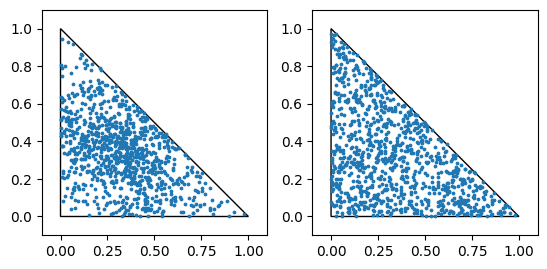

In [35]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

pts = np.array([[0,0], [0,1], [1,0]])
def draw_background(index):
    # DRAW THE TRIANGLE AS BACKGROUND
    p = Polygon(pts, closed=True, facecolor=(1,1,1,0), edgecolor=(0, 0, 0))

    plt.subplot(1, 2, index + 1)

    ax = plt.gca()
    ax.set_aspect('equal')
    ax.add_patch(p)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

def incorr_pts():
    # incorrect method:
    alpha, beta, gamma = np.random.random(1000), np.random.random(1000), np.random.random(1000) # sample in uniform distribution
    alpha, beta, gamma = alpha / (alpha + beta + gamma), beta / (alpha + beta + gamma), gamma / (alpha + beta + gamma)
    # print(alpha.shape, alpha.T.shape, pts[0].shape)
    # print(beta.shape, pts[1].shape)
    # print(gamma.shape, pts[2].shape)
    # print(beta)
    return np.outer(pts[0],alpha) + np.outer(pts[1],beta) + np.outer(pts[2],gamma)

def corr_pts():
    # correct method:
    alpha, beta = np.random.random(1000), np.random.random(1000) # sample in uniform distribution
    # print(alpha.shape, alpha.T.shape, pts[0].shape)
    # print(beta.shape, pts[1].shape)
    pprime = np.outer(pts[0], np.ones(1000)) + np.outer((pts[1]-pts[0]),alpha) + np.outer((pts[2]-pts[0]),beta)
    # print(pprime.shape)
    pprimeSum = np.sum(pprime, axis=0)
    # print(pprimeSum)
    pprimeOut = pprime[:, pprimeSum > 1]
    print("The number of points outside the triangle:", pprimeOut.shape[1])
    pprime[:, pprimeSum > 1] = np.outer(pts[1], np.ones(pprimeOut.shape[1])) + np.outer(pts[2], np.ones(pprimeOut.shape[1])) - pprime[:, pprimeSum > 1]
    return pprime


# YOUR CODE HERE
incorrPts = incorr_pts()
corrPts = corr_pts()

draw_background(0)
# REPLACE THE FOLLOWING LINE USING YOUR DATA (incorrect method)
plt.scatter(incorrPts[0, :], incorrPts[1, :], s=3) 

draw_background(1)
# REPLACE THE FOLLOWING LINE USING YOUR DATA (correct method)
plt.scatter(corrPts[0, :], corrPts[1, :], s=3) 

plt.show()

## Problem 3

In [ ]:
import numpy as np
npz = np.load("train.npz")
images = npz["images"]  # array with shape (N,Width,Height,3)
edges = npz["edges"]  # array with shape (N,Width,Height)

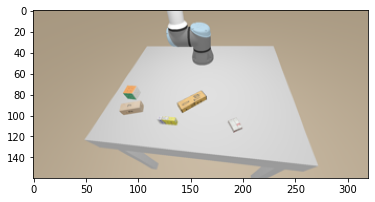

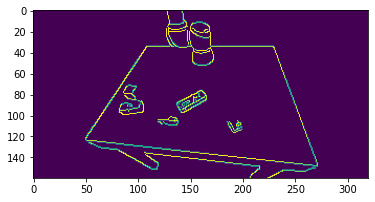

In [ ]:
plt.figure()
plt.imshow(images[0])
plt.figure()
plt.imshow(edges[0])

In [ ]:
images.shape, edges.shape, images.max(), np.unique(edges)

((1000, 160, 320, 3), (1000, 160, 320), 255, array([  0, 255], dtype=uint8))

In [ ]:
# Build and train your neural network here, optionally save the weights

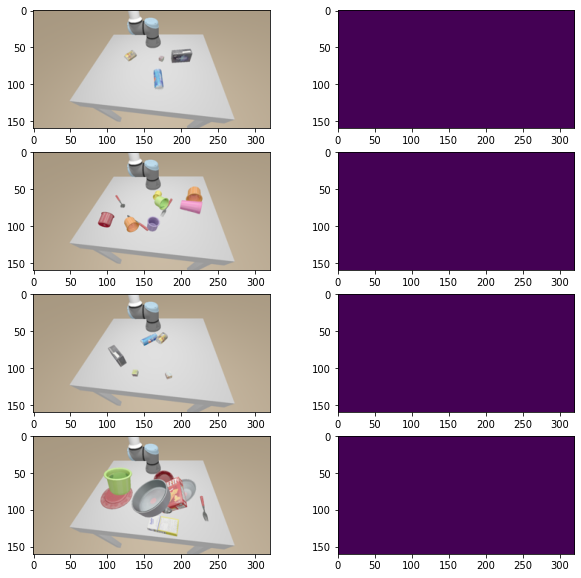

In [ ]:
# Test on the testing set
import numpy as np
import matplotlib.pyplot as plt
npz = np.load("test.npz")
test_images = npz["images"]

plt.figure(figsize=(10, 10))
for i, img in enumerate(test_images[:4]):
    plt.subplot(4, 2, i * 2 + 1)
    plt.imshow(img)
    
    plt.subplot(4, 2, i * 2 + 2)
    # edge = evaluate your model on the test set, replace the following line
    edge = np.zeros(img.shape[:2])
    plt.imshow(edge)